In [41]:
# import all the neccessary libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats


#for vitualisation

import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv(r"C:\Users\busto\Downloads\Unicorn_Companies.csv" ,encoding='utf-8')
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


##  Data Inspection 

In [43]:
#shape of data
df.shape

(1074, 10)

In [44]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [45]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [46]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


### Data Cleaning 

In [47]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Founded'] = pd.to_datetime(df['Year Founded'],format='%Y')
df['Age of joining']=((df['Date Joined'] - df['Year Founded']).dt.days /365).round(1)
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,$2B,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,$4B,"Institutional Venture Partners, Sequoia Capita...",6.9


In [50]:
print(df.columns.tolist())

['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country', 'Continent', 'Year Founded', 'Funding', 'Select Investors', 'Age of joining']


In [51]:
# statistical summary of the data
df.describe()

,Date Joined,Year Founded,Age of joining
count,1074,1074,1074.000000
mean,2020-05-19 15:35:51.955307264,2012-11-23 12:12:04.022346496,7.489851
min,2007-07-02 00:00:00,1919-01-01 00:00:00,-3.200000
25%,2019-05-20 06:00:00,2011-01-01 00:00:00,4.425000
50%,2021-03-29 00:00:00,2014-01-01 00:00:00,6.500000
75%,2021-09-19 18:00:00,2016-01-01 00:00:00,9.100000
max,2022-04-05 00:00:00,2021-01-01 00:00:00,98.500000
std,NaN,NaN,5.316578


## 1. Which unicorn companies have had the biggest return on investment?


In [52]:
# Top 10 Countries with the most Valuation
top10_countries = df['Country'].value_counts()[:10]
top10_countries

Country
United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: count, dtype: int64

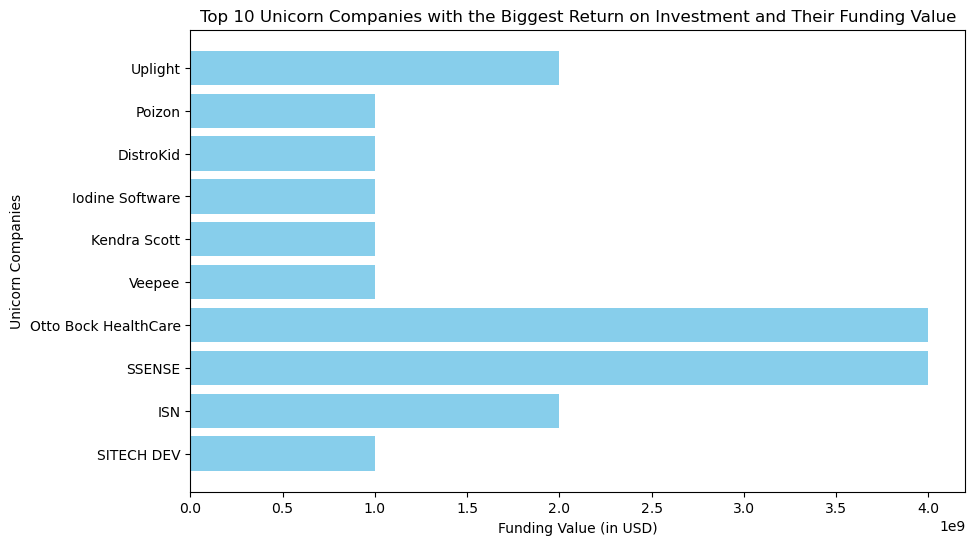

In [55]:
import matplotlib.pyplot as plt

# Company names
companies = ['Uplight', 'Poizon', 'DistroKid', 'Iodine Software', 'Kendra Scott', 'Veepee', 'Otto Bock HealthCare', 'SSENSE', 'ISN', 'SITECH DEV']

# Funding values
funding_values = [2000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 4000000000.0, 4000000000.0, 2000000000.0, 1000000000.0]

# Create a column chart
plt.figure(figsize=(10, 6))
plt.barh(companies, funding_values, color='skyblue')
plt.xlabel('Funding Value (in USD)')
plt.ylabel('Unicorn Companies')
plt.title('Top 10 Unicorn Companies with the Biggest Return on Investment and Their Funding Value')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()


### The provided chart depicts the funding values for the top 10 unicorn companies, revealing substantial disparities in financial backing. Otto Bock HealthCare and SSENSE stand out with the highest funding of $4 billion each, indicating substantial investor confidence and capital infusion. Meanwhile, the remaining companies received funding ranging from $1 billion to $2 billion, showcasing a diverse financial landscape among these successful unicorns. This observation underscores the significant financial investments made in these companies, reflecting their potential for growth and innovation in their respective industries. 

## 2. How long does it usually take for a company to become a unicorn? Has it always been this way?


In [56]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Age of joining'],
      dtype='object')

In [57]:
# check the columns that are numerical
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols

['Age of joining']

In [58]:
# Check the column names in your DataFrame
print(df.columns)

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Age of joining'],
      dtype='object')


In [59]:
# the number of unique Age of Joining  
df['Age of joining'].nunique()

191

In [60]:
age_of_joining = df.groupby('Company')['Age of joining'].sum().sort_values()
age_of_joining

Company
Yidian Zixun                  -3.2
Ola Electric Mobility          0.5
Playco                         0.7
ClickHouse                     0.8
candy.com                      0.8
                              ... 
Radius Payment Solutions      27.9
Thirty Madison                28.4
Five Star Business Finance    37.3
Promasidor Holdings           37.9
Otto Bock HealthCare          98.5
Name: Age of joining, Length: 1073, dtype: float64

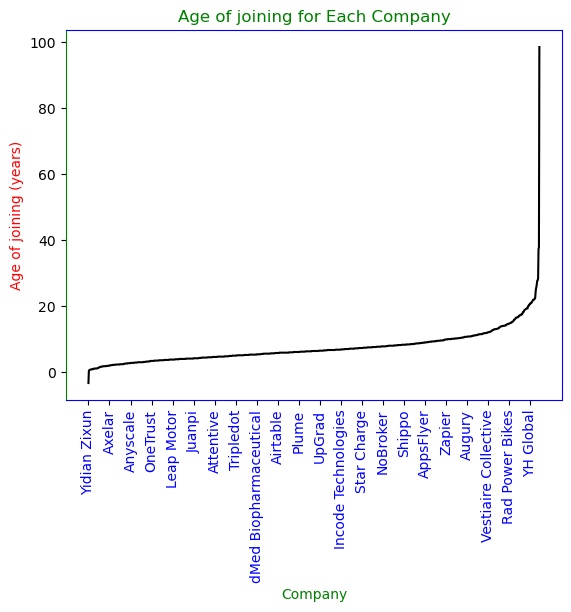

In [61]:
import matplotlib.pyplot as plt


# Assuming you have the DataFrame 'df' with the 'Company' and 'Age of Joining' columns

# Group the data by 'Company' and calculate the sum of 'Age of Joining'
age_of_joining = df.groupby('Company')['Age of joining'].sum()

# Sort the values in ascending order
age_of_joining = age_of_joining.sort_values()

# Create a line chart with black color
plt.plot(age_of_joining.values, color='black')
plt.xlabel('Company', color='green')  # Set the x-axis label color to blue
plt.ylabel('Age of joining (years)', color='red')  # Set the y-axis label color to blue
plt.title('Age of joining for Each Company', color='green')  # Set the title color to blue

# Adjust x-axis labels to show every 50th company
plt.xticks(range(0, len(age_of_joining), 50), age_of_joining.index[::50], rotation=90, color='blue')  # Set the x-axis label color to blue

# Set the text color to blue
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['left'].set_color('green')
plt.gca().spines['right'].set_color('blue')

# Display the chart
plt.show()

### There are a total of 1074 records for each variable. The average age of joining is 7.48, with a maximum age of joining at 98.5 and a minimum age of joining at -3.20. The earliest date of joining is 2007-07-02, and the latest date is 2022-04-05. Similarly, the earliest year funded is 1919, while the most recent year funded is 2021.

## 3. Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

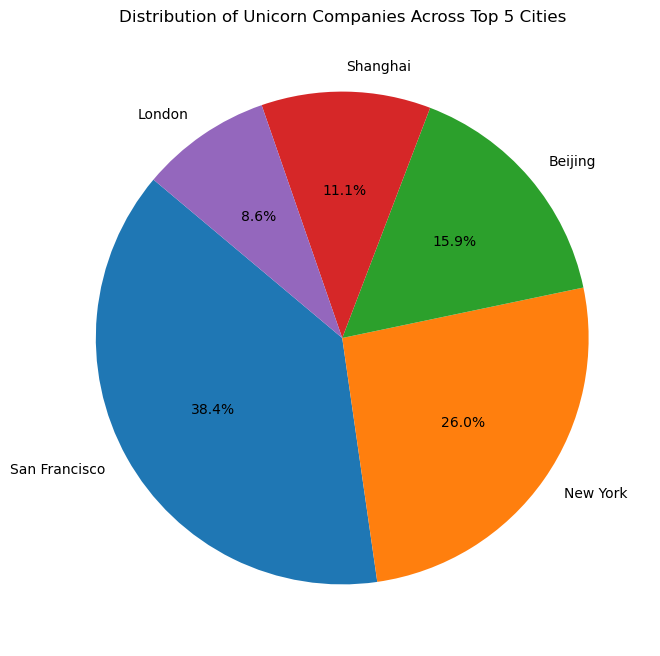

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\busto\Downloads\Unicorn_Companies.csv", encoding='utf-8')

# Assuming 'City' is the column representing the cities in the DataFrame
# Replace 'City' with the actual column name

# Get the top 5 cities based on the number of unicorn companies
top_cities = df['City'].value_counts().head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unicorn Companies Across Top 5 Cities')
plt.show()

###  The pie chart illustrates the distribution of unicorn companies across the top 5 cities in the dataset. San Francisco City dominates the landscape with 38.4% of the companies, followed closely by New York at 26%. London,Shanghai, and Beijing make up the remaining 35.6%. This distribution highlights the concentration of unicorn companies in specific cities, indicating potential regional investment opportunities. 

 ## 4. Which investors have funded the most unicorns?

In [4]:
import pandas as pd

# Replace the file path with the actual file path on your system
df = pd.read_csv(r"C:\Users\busto\Downloads\Unicorn_Companies.csv",encoding='utf-8')

# Count the occurrences of each investor and select the top investors
top_investors = df['Select Investors'].value_counts().head (10)

# Display the top investors
print(top_investors)


Select Investors
Sequoia Capital                                                                                3
Pelion Venture Partners, Foundation Capital, Thoma Bravo                                       2
Insight Partners, Sequoia Capital, Index Ventures                                              2
Speedinvest, Valar Ventures, Uniqa Ventures                                                    2
SoftBank Group                                                                                 2
Shunwei Capital Partners, China Media Group, Guangzhou Huiyin Aofeng Equity Investment Fund    2
General Atlantic                                                                               2
Qualcomm Ventures, Accel, Canaan Partners                                                      2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings                               2
Global Founders Capital, Shea Ventures, Greycroft                                              2
Name: count, 

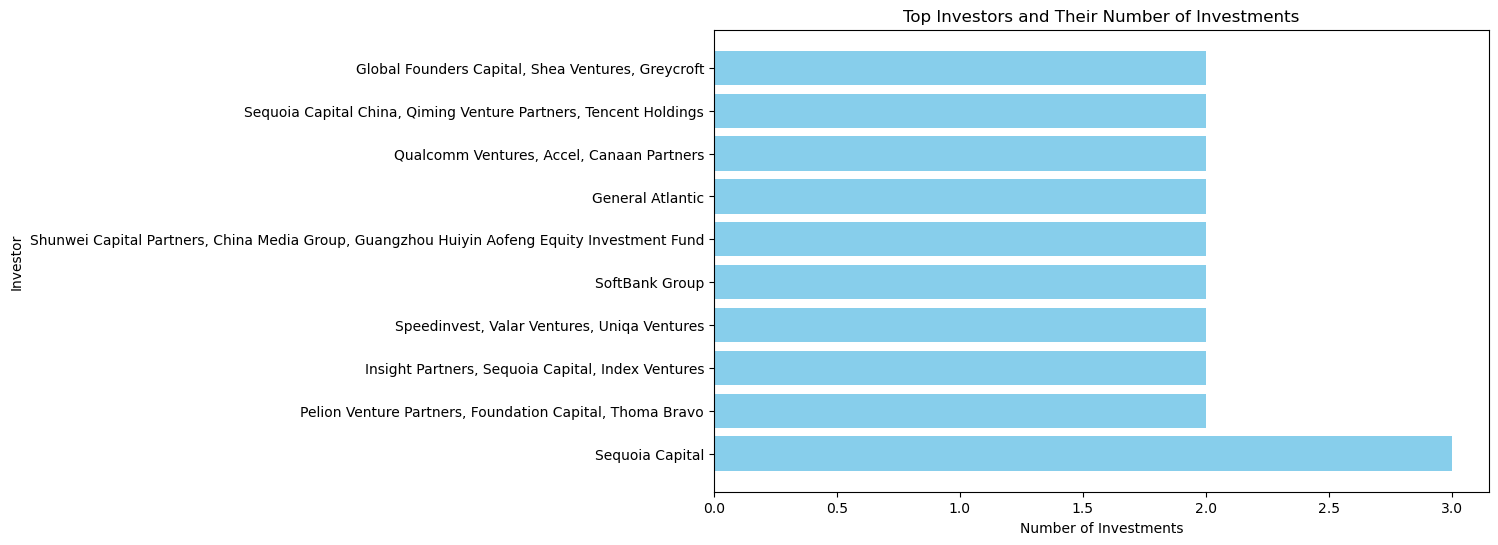

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'Investor': ['Sequoia Capital', 'Pelion Venture Partners, Foundation Capital, Thoma Bravo', 
                 'Insight Partners, Sequoia Capital, Index Ventures', 'Speedinvest, Valar Ventures, Uniqa Ventures',
                 'SoftBank Group', 'Shunwei Capital Partners, China Media Group, Guangzhou Huiyin Aofeng Equity Investment Fund',
                 'General Atlantic', 'Qualcomm Ventures, Accel, Canaan Partners', 
                 'Sequoia Capital China, Qiming Venture Partners, Tencent Holdings', 'Global Founders Capital, Shea Ventures, Greycroft'],
    'Count': [3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
}

df = pd.DataFrame(data)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Investor'], df['Count'], color='skyblue')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Top Investors and Their Number of Investments')
plt.show()


The top investors exhibit varying levels of investment activity, with Sequoia Capital leading with 3 investments, followed by several others with 2 investments each. This distribution suggests a mix of concentrated and diversified investment strategies among the top investors, reflecting their distinct approaches to funding promising ventures in the market.

## RECOMMENDATION

1. When considering investment opportunities, it's essential to recognize the diverse approaches of top investors, such as Sequoia Capital and others with multiple investments. Understanding their investment strategies can provide valuable insights into the types of ventures that attract their attention and funding. By studying their concentrated and diversified investment patterns, entrepreneurs and emerging companies can tailor their pitches and business plans to align with the preferences and priorities of these influential investors. Additionally, by acknowledging the distinct approaches of these top investors, entrepreneurs can gain a deeper understanding of the evolving landscape of funding and make informed decisions about seeking investment partnerships.

2. Regional Investment Opportunities: The concentration of unicorn companies in specific cities, such as San Francisco and New York, presents potential regional investment opportunities for venture capitalists and investors. By recognizing the distribution of unicorn companies across these cities, investors can explore the unique strengths and innovation ecosystems of each region, identifying promising investment prospects and fostering partnerships with emerging companies in these thriving hubs.

3. Market Expansion and Diversification: For entrepreneurs and emerging companies, understanding the distribution of unicorn companies across top cities can serve as a strategic guide for market expansion and diversification. By acknowledging the dominance of certain cities in the unicorn landscape, entrepreneurs can explore opportunities to establish a presence in these key regions, leveraging the existing innovation ecosystems and talent pools to drive growth and market penetration. Additionally, this insight can inform strategic decisions about expanding operations and seeking partnerships in regions with a high concentration of unicorn companies.

4. Long-Term Investment Strategies: The wide range of joining ages and funding years among unicorn companies suggests the importance of long-term investment strategies. For investors and venture capitalists, considering the historical joining ages and funding years of unicorn companies can provide valuable insights into the potential for sustained growth and innovation. By recognizing the longevity of successful companies and their ability to thrive over time, investors can develop investment strategies that prioritize long-term partnerships and sustainable growth opportunities.
5. Innovation and Adaptation: For entrepreneurs and emerging companies, understanding the historical joining ages and funding years of unicorn companies can highlight the importance of innovation and adaptation in the rapidly evolving market landscape. By acknowledging the early and recent milestones of successful companies, entrepreneurs can draw inspiration from their journeys and adapt their business models to align with changing market dynamics. This insight can inform strategic decisions about innovation, resilience, and long-term sustainability, guiding emerging companies toward success in the competitive unicorn ecosystem.
